In [2]:
import os
import math
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from mypackages.eRDF import (butter_lowpass_filter,DataProcessor, 
                            read_discus_fit_file, remove_empty_strings,
                              optimize_constant, rw) 

from mypackages.plot_style import set_plot_style

set_plot_style()

C:\Users\seccolev\data_processing\src\mypackages\eRDF.py:276: SyntaxWarning: invalid escape sequence '\A'
  ax[0].set_xlabel("Q ($\AA^{-1}$)")
C:\Users\seccolev\data_processing\src\mypackages\eRDF.py:282: SyntaxWarning: invalid escape sequence '\p'
  ax[1].plot(self.q, fq, label="$\phi(Q)$")
C:\Users\seccolev\data_processing\src\mypackages\eRDF.py:283: SyntaxWarning: invalid escape sequence '\A'
  ax[1].set_xlabel("Q ($\AA^{-1}$)")
C:\Users\seccolev\data_processing\src\mypackages\eRDF.py:284: SyntaxWarning: invalid escape sequence '\p'
  ax[1].set_ylabel("$\phi(Q)$")
C:\Users\seccolev\data_processing\src\mypackages\eRDF.py:285: SyntaxWarning: invalid escape sequence '\p'
  ax[1].set_title("Calculating $\phi(Q)$")
C:\Users\seccolev\data_processing\src\mypackages\eRDF.py:291: SyntaxWarning: invalid escape sequence '\A'
  ax[2].set_xlabel("r ($\AA$)")


## Importing DISCUS fq generated data

In [ ]:

# Path to the folder containing the files
path = "/home/ABTLUS/victor.secco/data_processing/EXP2PDF/DATA/In2O3/fqobs"

# Assuming file_names is already populated with the list of files
# Initialize an empty list to hold DataFrames
df_list = []

# Counter for naming columns
counter = 0

file_names = [x for x in os.listdir(path) if x.endswith("fqobs")]
file_names.sort()

# Loop through the files and process each one
for file in file_names:
    # Read the file into a DataFrame
    df = pd.read_csv(os.path.join(path, file), header=None, engine='python')
    df[0] = df[0].str.split(' ')
    df[0] = df[0].apply(remove_empty_strings)
    df[[0, 1]] = pd.DataFrame(df[0].tolist(), index=df.index)
    df = df.astype(float)

    df_dropped = df.drop(columns=[0])
    
    # Rename columns using the counter
    df_dropped.columns = [f'column_{counter + i}' for i in range(df_dropped.shape[1])]
    
    # Increment the counter for the next file's columns
    counter += df_dropped.shape[1]
    
    # Append the modified DataFrame to the list
    df_list.append(df_dropped)

# Concatenate all DataFrames in the list into a single DataFrame
final_df = pd.concat(df_list, axis=1)

df_cleaned = final_df.dropna()
df_cleaned = df_cleaned.T
# Optionally, display the final DataFrame or save it
print(df_cleaned)


In [3]:
df_list = []

counter = 0

path = r"C:\Users\seccolev\data_processing\data\processed\ePDF\In2O3\20250708\fq_all_profiles.csv"

df = pd.read_csv(path, header=0, engine='python')

df_cleaned = df.drop(columns=df.columns[0]).T
df_cleaned = df_cleaned.iloc[1:] 


In [194]:
df_cleaned.head()

,0,1,2,3,4,5,6,7,8,9,...,1217,1218,1219,1220,1221,1222,1223,1224,1225,1226
fq_2,-0.178165,-0.188453,-0.196130,-0.194342,-0.206755,-0.200700,-0.187133,-0.183408,-0.176256,-0.171009,...,-0.090755,-0.380037,0.370597,-1.630964,-0.207312,0.894320,-0.517411,-1.701993,0.311160,2.013461
fq_3,-0.212196,-0.210386,-0.229726,-0.230774,-0.227404,-0.222541,-0.206830,-0.200097,-0.188631,-0.192652,...,0.905580,0.878885,0.711847,0.218243,0.548772,0.254526,-0.371259,-1.291676,-0.726616,1.428850
fq_4,-0.110618,-0.116867,-0.140107,-0.148084,-0.156392,-0.160583,-0.155341,-0.146723,-0.147313,-0.141022,...,0.118865,-1.184841,-0.496118,0.001371,-0.472963,0.265595,0.366335,-0.322695,-0.595124,0.409046
fq_5,-0.168558,-0.175186,-0.180680,-0.194952,-0.210349,-0.208421,-0.210027,-0.189679,-0.174888,-0.161378,...,0.424786,0.731593,0.011360,1.223041,-1.818052,-1.485492,0.004375,0.524896,0.511783,1.639130
fq_6,-0.190485,-0.206691,-0.209688,-0.205906,-0.200752,-0.196601,-0.191619,-0.184003,-0.189161,-0.194610,...,-0.022776,-0.221952,-1.357572,-0.358694,-0.320523,-0.079825,0.691650,0.202122,1.104485,0.272272


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Standardizing the features
scaler = StandardScaler()
fq_scaled = scaler.fit_transform(df_cleaned)

# Instantiate the PCA model
pca = PCA(n_components=20)  # You can specify the number of components you want to retain

# Fit and transform the data
fq_pca = pca.fit_transform(fq_scaled)

# Convert the result to a DataFrame for easier handling
#fq_pca_df = pd.DataFrame(fq_pca, columns=['PC1', 'PC2'])

# Instantiate the PCA model
pca = PCA(n_components=20)  # You can specify the number of components you want to retain

# Fit and transform the data
pca.fit(fq_scaled)
fq_pca = pca.transform(fq_scaled)
# Convert the result to a DataFrame for easier handling
#fq_pca_df = pd.DataFrame(fq_pca, columns=['PC1', 'PC2'])

#plt.figure(figsize=(8, 6))
#plt.scatter(fq_pca_df['PC1'], fq_pca_df['PC2'])
#plt.xlabel('Principal Component 1')
#plt.ylabel('Principal Component 2')
#plt.title('PCA of fq DataFrame')
#plt.show()

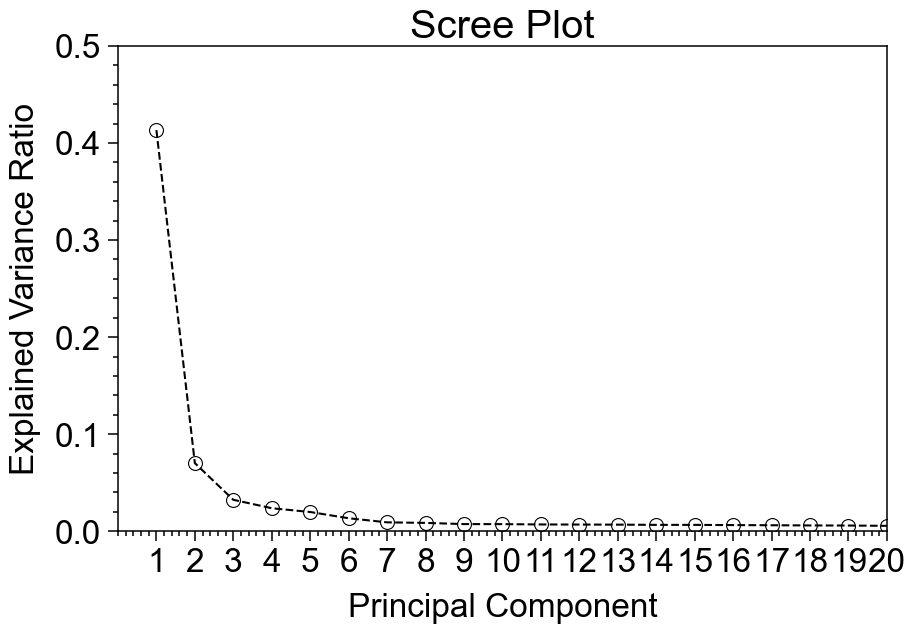

In [5]:
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.show()

In [6]:
n_components = 1
pca = PCA(n_components=n_components)
fq_pca_reduced = pca.fit_transform(fq_scaled)

# Reconstruct the data from the selected components
fq_reconstructed = pca.inverse_transform(fq_pca_reduced)

# Reverse the standardization to get the data back to its original scale
fq_reconstructed_original_scale = scaler.inverse_transform(fq_reconstructed)

# Convert the reconstructed data back to a DataFrame (optional)
fq_reconstructed_df = pd.DataFrame(fq_reconstructed_original_scale, columns=df_cleaned.columns)

# Optionally, inspect the reconstructed DataFrame
print(fq_reconstructed_df)

         0         1         2         3         4         5         6     \
0    0.414206  0.288517  0.173112  0.069170 -0.013529 -0.087284 -0.152733   
1    0.411675  0.287416  0.173374  0.070532 -0.011432 -0.084632 -0.149728   
2    0.412097  0.287600  0.173330  0.070305 -0.011782 -0.085074 -0.150229   
3    0.415059  0.288888  0.173023  0.068710 -0.014235 -0.088178 -0.153746   
4    0.412535  0.287790  0.173285  0.070069 -0.012144 -0.085533 -0.150748   
..        ...       ...       ...       ...       ...       ...       ...   
153  0.340347  0.256404  0.180757  0.108930  0.047652 -0.009895 -0.065037   
154  0.337182  0.255028  0.181085  0.110634  0.050274 -0.006579 -0.061279   
155  0.339672  0.256111  0.180827  0.109293  0.048211 -0.009188 -0.064235   
156  0.339882  0.256202  0.180805  0.109180  0.048038 -0.009408 -0.064484   
157  0.338012  0.255389  0.180999  0.110187  0.049586 -0.007449 -0.062264   

         7         8         9     ...      1247      1248      1249  \
0  

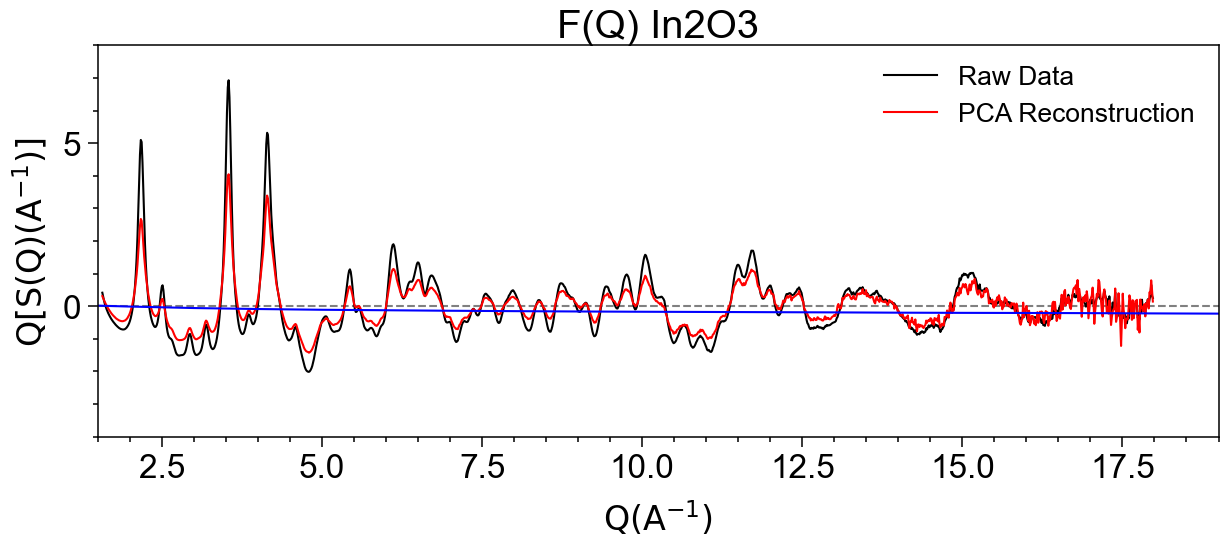

In [51]:
q = df["q"].values

row_values = fq_reconstructed_df.iloc[75, :].values
original_values = df_cleaned.mean(axis=0)
mean_values = fq_reconstructed_df.mean(axis=0)


fig, ax = plt.subplots(figsize = (13,6))

# Add two horizontal lines centered in each plot
ax.axhline(y=np.mean(mean_values * 1.8), color='gray', linestyle='--')
ax.plot(q, original_values, label="Raw Data")
ax.plot(q, row_values, label='PCA Reconstruction', color='red')
#ax.plot(q, mean_values, label='PCA reconstruction mean')
#ax.plot(original_values - row_values, label='Difference', color = 'gray')
plt.plot(original_values-row_values)

# Set labels, limits, and ticks
ax.set_ylabel(r"$\mathrm{Q[S(Q) (A^{-1})]}$")
ax.set_xlabel(r"$\mathrm{Q (A^{-1})}$")
ax.set_xlim(1.5, 19)


# Create legend (initial position)
legend = ax.legend(fontsize=19, frameon=False,  bbox_to_anchor=(0.5, 0.51, 0.5, 0.5))

plt.title('F(Q) In2O3')
plt.tight_layout()
#plt.savefig('/home/ABTLUS/victor.secco/data_processing/Imagens/B-MRS 2024/pca_fq.png', dpi = 600)
# Show the plot
plt.show()

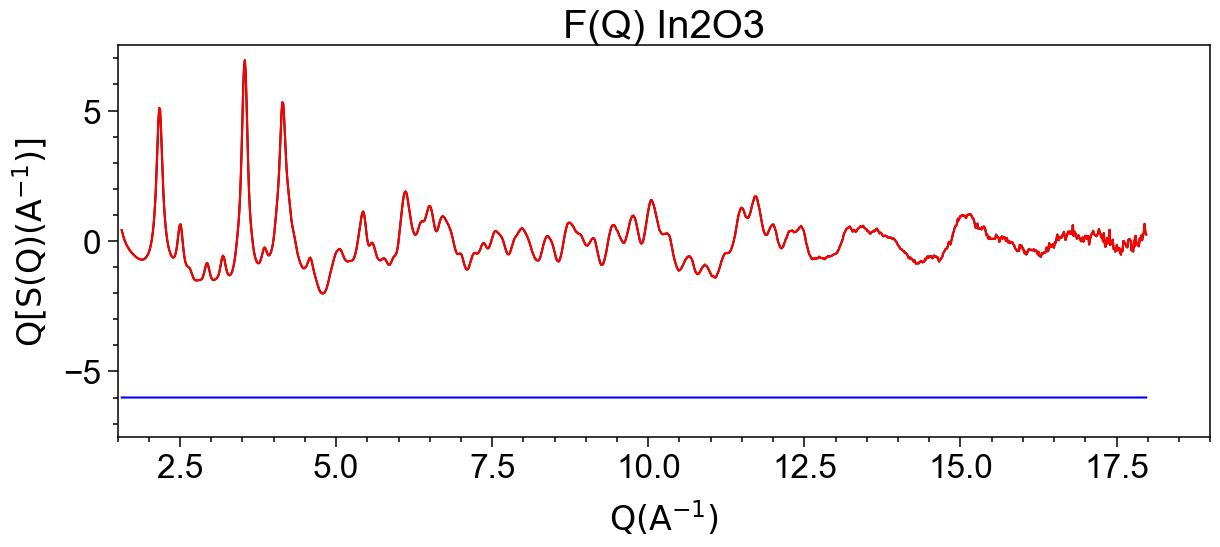

In [53]:
plt.figure(figsize = (13,6))
plt.plot(q, original_values, label="Raw Data")
plt.plot(q, mean_values, label='PCA Reconstruction', color='red')
plt.plot(q, original_values-mean_values-6)

# Set labels, limits, and ticks
plt.ylabel(r"$\mathrm{Q[S(Q) (A^{-1})]}$")
plt.xlabel(r"$\mathrm{Q (A^{-1})}$")
plt.xlim(1.5, 19)


# Create legend (initial position)
legend = ax.legend(fontsize=19, frameon=False,  bbox_to_anchor=(0.5, 0.51, 0.5, 0.5))

plt.title('F(Q) In2O3')
plt.tight_layout()
#plt.savefig('/home/ABTLUS/victor.secco/data_processing/Imagens/B-MRS 2024/pca_fq.png', dpi = 600)
# Show the plot
plt.show()

In [208]:
print("First PCA score:", fq_pca_reduced[0])
print("All PCA scores:", fq_pca_reduced[:5])
print("Row - Mean max abs diff:", np.max(np.abs(row_values - mean_values)))


First PCA score: [8.15944661]
All PCA scores: [[8.15944661]
 [3.03826201]
 [7.25311801]
 [2.44306003]
 [7.59822737]]
Row - Mean max abs diff: 0.20786686027657214


In [225]:
data = pd.DataFrame(np.transpose(np.array((q, mean_values))))
data.rename(columns={0:'q',1:'fq'},inplace=True)

output_path = os.path.dirname(path)

data.to_csv(os.path.join(output_path, 'fq_PCA.csv'), sep='\t', float_format="%.10f", index=False)